In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

In [47]:
df = pd.read_csv('data/DataAnalyst.csv', encoding='gb2312')
df.head()

city    companyFullName  companyId                  companyLabelList  \
0   上海     纽海信息技术(上海)有限公司       8581  ['技能培训', '节日礼物', '带薪年假', '岗位晋升']   
1   上海   上海点荣金融信息服务有限责任公司      23177  ['节日礼物', '带薪年假', '岗位晋升', '扁平管理']   
2   上海     上海晶樵网络信息技术有限公司      57561  ['技能培训', '绩效奖金', '岗位晋升', '管理规范']   
3   上海  杭州数云信息技术有限公司上海分公司       7502  ['绩效奖金', '股票期权', '五险一金', '通讯津贴']   
4   上海     上海银基富力信息技术有限公司     130876  ['年底双薪', '通讯津贴', '定期体检', '绩效奖金']   

  companyShortName companySize           businessZones firstType secondType  \
0              1号店     2000人以上                  ['张江']        技术       数据开发   
1              点融网   500-2000人  ['五里桥', '打浦桥', '制造局路']        技术       数据开发   
2              SPD     50-150人                 ['打浦桥']        设计       数据分析   
3               数云    150-500人  ['龙华', '上海体育场', '万体馆']     市场与销售       数据分析   
4             银基富力      15-50人   ['上海影城', '新华路', '虹桥']        技术       软件开发   

  education industryField  positionId     positionAdvantage  \
0        硕士         移动互联网     2537336                  知名平台   
1        本科            金融     2427485  挑战机会,团队好,与大牛合作,工作环境好   
2        本科         移动互联网     2511252            时间自由,领导nic   
3        本科     企业服务,数据服务     2427530   五险一金 绩效奖金 带薪年假 节日福利   
4        本科            其他     2245819                在大牛下指导   

          positionName                 positionLables   salary workYear  
0                数据分析师  ['分析师', '数据分析', '数据挖掘', '数据']    7k-9k    应届毕业生  
1  数据分析师-CR2017-SH2909  ['分析师', '数据分析', '数据挖掘', '数据']  10k-15k    应届毕业生  
2                数据分析师          ['分析师', '数据分析', '数据']    4k-6k    应届毕业生  
3       大数据业务分析师【数云校招】     ['商业', '分析师', '大数据', '数据']    6k-8k    应届毕业生  
4           BI开发/数据分析师    ['分析师', '数据分析', '数据', 'BI']    2k-3k    应届毕业生

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [49]:
df = df.drop_duplicates(subset='positionId', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


In [60]:
# 加工salary字段
def get_salary(salary, method):
    arr = salary.split('-')
    if len(arr) == 1:
        bottom = arr[0].upper()
        bottom = bottom[:bottom.find('K')]
        top = bottom
    else:
        bottom = arr[0][:-1]
        top = arr[1].upper()
        top = top[:top.find('K')]
    if method == 'top':
        return top
    elif method == 'bottom':
        return bottom
df['bottomSalary'] = df.salary.apply(get_salary, method='bottom')
df.bottomSalary = df.bottomSalary.astype('int') # 类型转换
df['topSalary'] = df.salary.apply(get_salary, method='top')
df.topSalary = df.topSalary.astype('int') # 类型转换
df['avgSalary'] = (df['bottomSalary'] + df['topSalary']) / 2
df.head()

city    companyFullName  companyId                  companyLabelList  \
0   上海     纽海信息技术(上海)有限公司       8581  ['技能培训', '节日礼物', '带薪年假', '岗位晋升']   
1   上海   上海点荣金融信息服务有限责任公司      23177  ['节日礼物', '带薪年假', '岗位晋升', '扁平管理']   
2   上海     上海晶樵网络信息技术有限公司      57561  ['技能培训', '绩效奖金', '岗位晋升', '管理规范']   
3   上海  杭州数云信息技术有限公司上海分公司       7502  ['绩效奖金', '股票期权', '五险一金', '通讯津贴']   
4   上海     上海银基富力信息技术有限公司     130876  ['年底双薪', '通讯津贴', '定期体检', '绩效奖金']   

  companyShortName companySize           businessZones firstType secondType  \
0              1号店     2000人以上                  ['张江']        技术       数据开发   
1              点融网   500-2000人  ['五里桥', '打浦桥', '制造局路']        技术       数据开发   
2              SPD     50-150人                 ['打浦桥']        设计       数据分析   
3               数云    150-500人  ['龙华', '上海体育场', '万体馆']     市场与销售       数据分析   
4             银基富力      15-50人   ['上海影城', '新华路', '虹桥']        技术       软件开发   

  education industryField  positionId     positionAdvantage  \
0        硕士         移动互联网     2537336                  知名平台   
1        本科            金融     2427485  挑战机会,团队好,与大牛合作,工作环境好   
2        本科         移动互联网     2511252            时间自由,领导nic   
3        本科     企业服务,数据服务     2427530   五险一金 绩效奖金 带薪年假 节日福利   
4        本科            其他     2245819                在大牛下指导   

          positionName                 positionLables   salary workYear  \
0                数据分析师  ['分析师', '数据分析', '数据挖掘', '数据']    7k-9k    应届毕业生   
1  数据分析师-CR2017-SH2909  ['分析师', '数据分析', '数据挖掘', '数据']  10k-15k    应届毕业生   
2                数据分析师          ['分析师', '数据分析', '数据']    4k-6k    应届毕业生   
3       大数据业务分析师【数云校招】     ['商业', '分析师', '大数据', '数据']    6k-8k    应届毕业生   
4           BI开发/数据分析师    ['分析师', '数据分析', '数据', 'BI']    2k-3k    应届毕业生   

   bottomSalary  topSalary  avgSalary  
0             7          9        8.0  
1            10         15       12.5  
2             4          6        5.0  
3             6          8        7.0  
4             2          3        2.5

In [61]:
df = df[['city', 'companyShortName', 'companySize',
         'education', 'positionName', 'positionLables',
         'workYear', 'avgSalary']]
df.head()

city companyShortName companySize education         positionName  \
0   上海              1号店     2000人以上        硕士                数据分析师   
1   上海              点融网   500-2000人        本科  数据分析师-CR2017-SH2909   
2   上海              SPD     50-150人        本科                数据分析师   
3   上海               数云    150-500人        本科       大数据业务分析师【数云校招】   
4   上海             银基富力      15-50人        本科           BI开发/数据分析师   

                  positionLables workYear  avgSalary  
0  ['分析师', '数据分析', '数据挖掘', '数据']    应届毕业生        8.0  
1  ['分析师', '数据分析', '数据挖掘', '数据']    应届毕业生       12.5  
2          ['分析师', '数据分析', '数据']    应届毕业生        5.0  
3     ['商业', '分析师', '大数据', '数据']    应届毕业生        7.0  
4    ['分析师', '数据分析', '数据', 'BI']    应届毕业生        2.5

In [62]:
df.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [63]:
df.describe()

avgSalary
count  5031.000000
mean     17.111409
std       8.996242
min       1.500000
25%      11.500000
50%      15.000000
75%      22.500000
max      75.000000

In [78]:
df.groupby('city').mean()

avgSalary
city           
上海    17.280388
北京    18.688539
南京    10.951807
厦门    10.966667
天津     8.250000
广州    12.702985
成都    12.848148
杭州    16.455665
武汉    11.297101
深圳    17.591082
苏州    14.554054
西安    10.671053
长沙     9.600000

In [79]:
df_city_education = df.groupby(['city', 'education']).mean()
df_city_education

avgSalary
city education           
上海   不限         14.051471
     博士         15.000000
     大专         13.395455
     本科         17.987552
     硕士         19.180000
北京   不限         15.673387
     博士         25.000000
     大专         12.339474
     本科         19.435802
     硕士         19.759740
南京   不限          7.000000
     大专          9.272727
     本科         11.327869
     硕士         13.500000
厦门   不限         12.500000
     大专          6.785714
     本科         11.805556
     硕士         15.750000
天津   不限          3.500000
     大专          5.500000
     本科          9.300000
广州   不限          9.250000
     大专          8.988095
     本科         14.170259
     硕士         14.571429
成都   不限         10.562500
     大专         11.000000
     本科         13.520202
     硕士         12.750000
杭州   不限         18.269231
     大专         12.327586
     本科         16.823432
     硕士         20.710526
武汉   不限         10.950000
     大专         11.214286
     本科         11.500000
     硕士          7.000000
深圳   不限         15.100000
     博士         35.000000
     大专         13.898936
     本科         18.532911
     硕士         18.029412
苏州   大专         14.600000
     本科         14.310345
     硕士         16.833333
西安   不限          8.666667
     大专          8.150000
     本科         12.208333
     硕士          5.000000
长沙   不限          7.642857
     大专          9.000000
     本科         10.633333
     硕士          9.000000

In [80]:
df_city_education = df_city_education.unstack()
df_city_education

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         14.051471  15.0  13.395455  17.987552  19.180000
北京         15.673387  25.0  12.339474  19.435802  19.759740
南京          7.000000   NaN   9.272727  11.327869  13.500000
厦门         12.500000   NaN   6.785714  11.805556  15.750000
天津          3.500000   NaN   5.500000   9.300000        NaN
广州          9.250000   NaN   8.988095  14.170259  14.571429
成都         10.562500   NaN  11.000000  13.520202  12.750000
杭州         18.269231   NaN  12.327586  16.823432  20.710526
武汉         10.950000   NaN  11.214286  11.500000   7.000000
深圳         15.100000  35.0  13.898936  18.532911  18.029412
苏州               NaN   NaN  14.600000  14.310345  16.833333
西安          8.666667   NaN   8.150000  12.208333   5.000000
长沙          7.642857   NaN   9.000000  10.633333   9.000000

In [82]:
df_city_education = df.groupby(['city', 'education']).avgSalary.count().unstack()
df_city_education # 查看招聘人数

education     不限   博士     大专      本科     硕士
city                                       
上海          68.0  3.0  110.0   723.0   75.0
北京         124.0  2.0  190.0  1877.0  154.0
南京           5.0  NaN   11.0    61.0    6.0
厦门           3.0  NaN    7.0    18.0    2.0
天津           1.0  NaN    4.0    15.0    NaN
广州          12.0  NaN   84.0   232.0    7.0
成都           8.0  NaN   26.0    99.0    2.0
杭州          26.0  NaN   58.0   303.0   19.0
武汉          10.0  NaN   14.0    44.0    1.0
深圳          20.0  1.0   94.0   395.0   17.0
苏州           NaN  NaN    5.0    29.0    3.0
西安           3.0  NaN   10.0    24.0    1.0
长沙           7.0  NaN    2.0    15.0    1.0

In [85]:
# 看看公司的招聘情况
df.groupby('companyShortName').avgSalary.agg(['count', 'mean']).sort_values(by='count', ascending=False)

count       mean
companyShortName                  
美团点评                175  21.862857
滴滴出行                 64  27.351562
百度                   44  19.136364
网易                   36  18.208333
今日头条                 32  17.125000
腾讯                   32  22.437500
京东                   32  20.390625
百度外卖                 31  17.774194
个推                   31  14.516129
TalkingData          28  16.160714
宜信                   27  22.851852
搜狐媒体                 23  25.739130
饿了么                  23  19.391304
Gridsum 国双           23  19.086957
去哪儿网                 22  17.863636
汽车之家                 21  18.952381
乐视                   19  21.052632
京东商城                 19  23.763158
滴滴出行（小桔科技）           18  34.722222
人人行(借贷宝)             17  21.088235
链家网                  16  17.250000
嘉琪科技                 16  24.625000
百融金服                 16  17.500000
易到用车                 16  16.156250
通联数据                 16   8.843750
星河互联集团               16  29.062500
陌陌                   15  18.566667
买单侠                  15  18.600000
有数金服                 15  13.700000
返利网                  15  23.833333
...                 ...        ...
图灵机器人                 1  32.500000
国金证券                  1  37.500000
大观资本                  1   4.500000
大麦网                   1  55.000000
天会创投                  1   5.000000
天会皓闻                  1   3.500000
太子龙                   1   4.000000
天骄尚学                  1  10.000000
天阳科技                  1  11.500000
天闻数媒                  1  15.000000
天融互联                  1  20.000000
天育                    1   7.000000
天翼阅读文化传播有限公司          1  15.000000
天眼互联                  1   7.500000
天相瑞通                  1   7.500000
天玑科技                  1  15.000000
天源迪科                  1  31.500000
天津赛维斯科技有限公司           1   5.000000
天津航空                  1   9.000000
天津美源星                 1   3.500000
天津小猫                  1  11.500000
天气宝                   1  15.000000
天星资本                  1  11.000000
天弘基金                  1  25.000000
天尧信息                  1  15.000000
天宝                    1  22.500000
天天果园                  1  17.500000
天地汇                   1  14.000000
天同                    1  15.000000
龙浩通信                  1   5.000000

[2243 rows x 2 columns]

In [86]:
df.groupby('companyShortName').avgSalary.agg(lambda x: max(x) - min(x))

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [88]:
def topN(df, n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending=False)[:n]
df.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      亚信                   3
厦门    美图公司                 4
      Datartisan 数据工匠      2
      厦门融通信息技术有限责任公司       2
      吉才神                  1
      科莫宝                  1
天津    神州商龙                 2
      天津航空                 1
      58到家                 1
      安正软件                 1
      神州优车集团               1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      卡宝宝                  6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

In [89]:
df.groupby('city').positionName.apply(topN)

city                
上海    数据分析师              79
      大数据开发工程师           37
      数据产品经理             31
      大数据工程师             26
      高级数据分析师            20
北京    数据分析师             238
      数据产品经理            121
      大数据开发工程师           69
      分析师                49
      数据分析               42
南京    大数据开发工程师            5
      数据分析师               5
      大数据工程师              3
      大数据架构师              3
      数据规划（财务数据类）         2
厦门    数据分析专员              3
      数据分析师               3
      大数据开发工程师            2
      证券分析师               1
      需求分析师               1
天津    数据分析师               3
      数据工程师               2
      数据仓库工程师             1
      投资分析师               1
      大数据工程师数据挖掘方向        1
广州    数据分析师              31
      需求分析师              23
      大数据开发工程师           13
      数据分析专员             10
      高级数据分析师             9
                       ... 
杭州    数据分析师              44
      大数据开发工程师           22
      数据产品经理             15
      数据仓库工程师            11

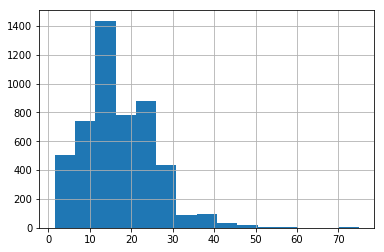

In [67]:
df.avgSalary.hist(bins=15)

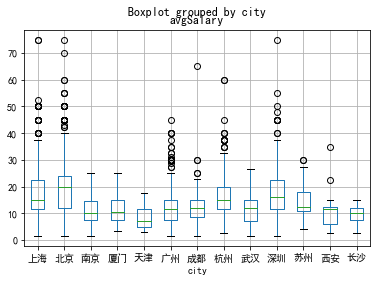

In [69]:
df.boxplot(column='avgSalary', by='city')

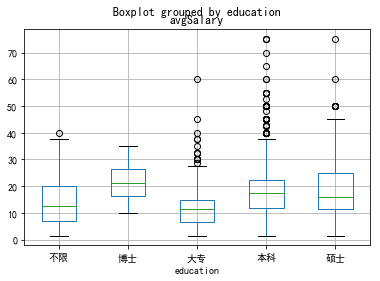

In [70]:
df.boxplot(column='avgSalary', by='education')

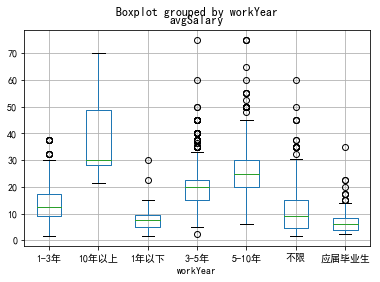

In [73]:
df.boxplot(column='avgSalary', by='workYear')

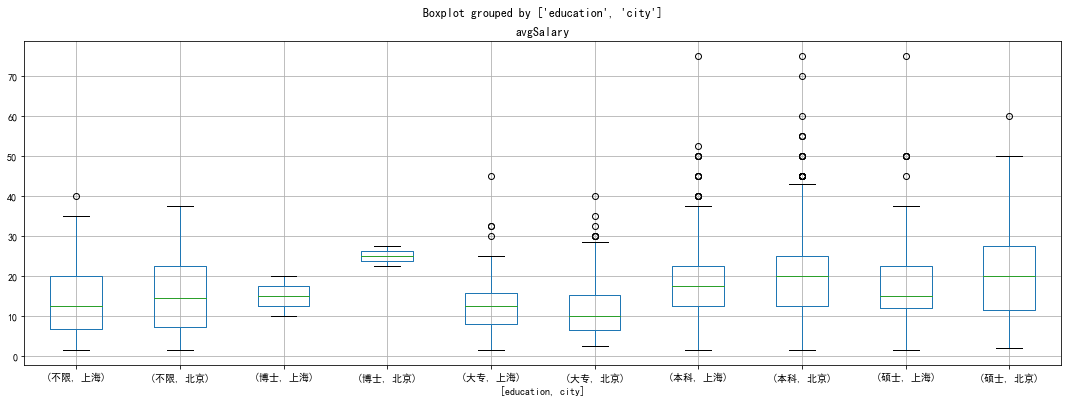

In [76]:
df_bj_sh = df[df['city'].isin(['上海', '北京'])]
df_bj_sh.boxplot(column='avgSalary', by=['education','city'], figsize=(18, 6))

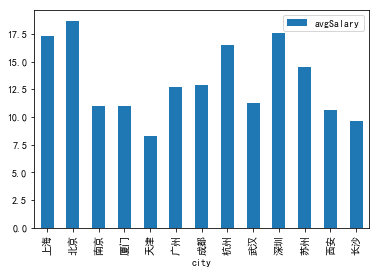

In [90]:
df.groupby('city').mean().plot.bar()

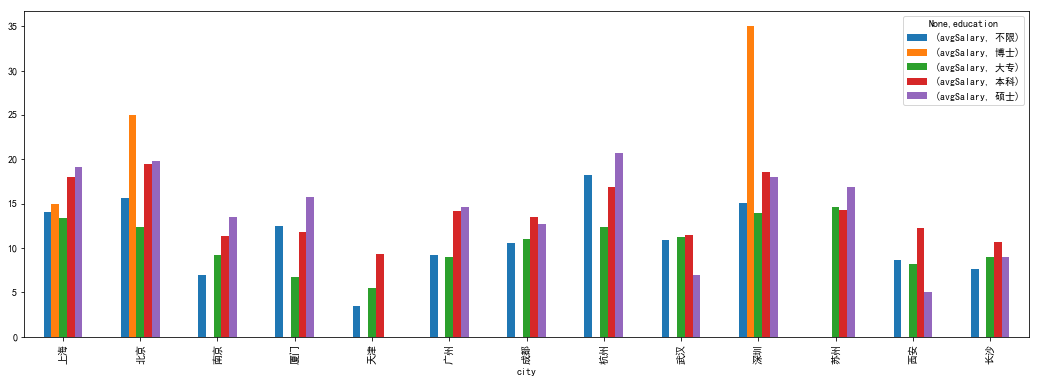

In [92]:
df.groupby(['city', 'education']).mean().unstack().plot.bar(figsize=(18, 6))

In [99]:
# 标签处理
lables = df.positionLables.str[1:-1] # Remove[]
lables = lables.str.replace(' ', '')
lables[:5]

0    '分析师','数据分析','数据挖掘','数据'
1    '分析师','数据分析','数据挖掘','数据'
2           '分析师','数据分析','数据'
3       '商业','分析师','大数据','数据'
4      '分析师','数据分析','数据','BI'
Name: positionLables, dtype: object

In [104]:
df_labels = lables.dropna().str.split(',').apply(pd.value_counts).unstack()
# 不用担心NaN，可以进一步处理。

In [106]:
df_labels = df_labels.dropna().reset_index()

In [108]:
df_labels = df_labels.groupby('level_0').count()
df_labels.head()

level_1    0
level_0                
'.NET'           6    6
'15天年假'          1    1
'Android'        1    1
'BD'            11   11
'BI'           201  201

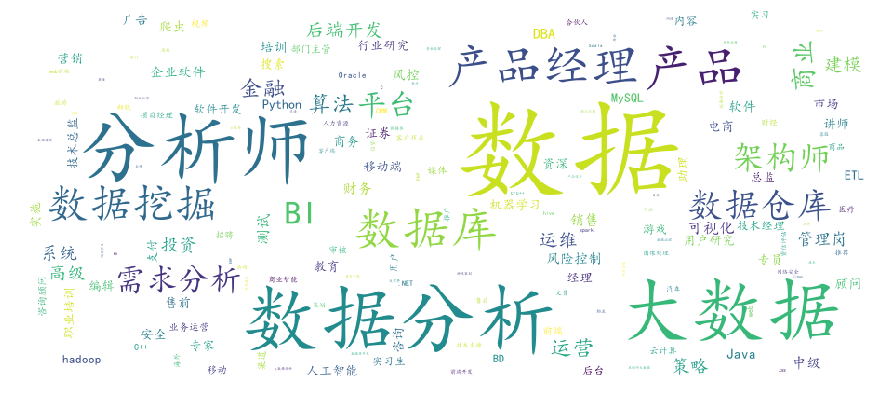

In [113]:
from wordcloud import WordCloud

df_labels.index = df_labels.index.str.replace("'", '')
wc = WordCloud(font_path='simkai.ttf', width=900, height=400, background_color='white')
wc.fit_words(df_labels.level_1)
f, axis = plt.subplots(figsize=(15, 15))
axis = plt.imshow(wc)
plt.axis('off')
plt.show()